## Imports

In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt

## Load Data

In [2]:
DATA_PATH = Path('./data')
AIR_GHG = DATA_PATH / 'OECD' / 'AIR_GHG.csv'

df = pd.read_csv(AIR_GHG)

## Data Exploration

In [3]:
df.columns

Index(['COU', 'Country', 'POL', 'Pollutant', 'VAR', 'Variable', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [4]:
df.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


In [5]:
df.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Russia', 'Slovenia', 'Latvia', 'Lithuania',
       'OECD - Total', 'OECD - Europe', 'Brazil',
       "China (People's Republic of)", 'Colombia', 'Costa Rica', 'India',
       'Indonesia', 'South Africa', 'Argentina',
       'European Union (28 countries)'], dtype=object)

In [6]:
df.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,52578.000000,52578.000000,52578.000000,0.0,0.0,5.257800e+04
mean,2003.962741,2003.962741,1.434726,NaN,NaN,1.421543e+05
std,8.258551,8.258551,1.498593,NaN,NaN,1.652310e+06
min,1990.000000,1990.000000,0.000000,NaN,NaN,-1.479158e+06
25%,1997.000000,1997.000000,0.000000,NaN,NaN,1.718825e+01
50%,2004.000000,2004.000000,0.000000,NaN,NaN,1.014720e+02
75%,2011.000000,2011.000000,3.000000,NaN,NaN,7.697484e+03
max,2018.000000,2018.000000,3.000000,NaN,NaN,9.731788e+07


## Resolve Power

In [7]:
df.Value = df.Value * 10 **  df['PowerCode Code']

## Filter only for totals

In [8]:
df = df[df['VAR'] == 'TOTAL']

## Drop Estimates

In [9]:
df = df[df['Flag Codes'].isnull()]

## Delete unneaded columns

In [10]:
df = df.drop(labels=['COU','Pollutant', 'VAR', 'Variable', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'], axis=1)

## Delete old Data (< 2005)

In [11]:
df = df[df.YEA > 2005]

## Normalize Data

In [12]:
DATA_PATH = Path('./data')
HISTPOP = DATA_PATH / 'OECD' / 'HISTPOP.csv'

pop = pd.read_csv(HISTPOP)
pop = pop[pop.SEX == 'T']
pop = pop[pop.AGE == 'TOTAL']

#

for i in df.index:
    ctr = df['Country'][i]
    yea = df['YEA'][i]
    norm = pop[(pop.Country == ctr) & (pop.Time == yea)].Value
    if norm.empty:
        norm = 1.0
    
    df['Value'][i]=  df['Value'][i] / norm

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mhf/opt/anaconda3/envs/tuw/lib/pytho

## Transform data into years

In [13]:
df = df.pivot(index=['Country', 'POL'], columns='YEA', values=['Value']).reset_index()

df['2019'] = np.NaN
df['2020'] = np.NaN

## Extract Polution Type

In [14]:
CH4 = df[df['POL'] == 'CH4']
CO2 = df[df['POL'] == 'CO2']
HFC = df[df['POL'] == 'HFC']
HFC_PFC = df[df['POL'] == 'HFC_PFC']
N2O = df[df['POL'] == 'N2O']
NF3 = df[df['POL'] == 'NF3']
PFC = df[df['POL'] == 'PFC']
SF6 = df[df['POL'] == 'SF6']

In [15]:
CH4 = CH4.drop(labels=['POL'], axis=1)
CO2 = CO2.drop(labels=['POL'], axis=1)
HFC = HFC.drop(labels=['POL'], axis=1)
HFC_PFC = HFC_PFC.drop(labels=['POL'], axis=1)
N2O = N2O.drop(labels=['POL'], axis=1)
NF3 = NF3.drop(labels=['POL'], axis=1)
PFC = PFC.drop(labels=['POL'], axis=1)
SF6 = SF6.drop(labels=['POL'], axis=1)

/Users/mhf/opt/anaconda3/envs/tuw/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [16]:
CH4

Country     Value                                \
YEA                                     2006      2007      2008      2009   
0                        Argentina  2.574095  2.549978  2.465743  2.350465   
7                        Australia  5.444444  5.332589  5.146245  4.996785   
14                         Austria  0.931335  0.915607  0.897609  0.886310   
22                         Belgium  0.869297  0.857284  0.832035  0.819348   
30                          Brazil       NaN       NaN       NaN       NaN   
34                          Canada  3.215439  3.134568  3.013519  2.792896   
42                           Chile  0.949463  0.902947  0.854190  0.824379   
49    China (People's Republic of)       NaN       NaN       NaN       NaN   
56                        Colombia  0.921763  0.929493  0.937036  0.956496   
62                      Costa Rica       NaN       NaN       NaN       NaN   
68                  Czech Republic  1.452076  1.402047  1.399327  1.357838   
76                         Denmark  1.449039  1.438505  1.409044  1.377643   
83                         Estonia  0.895583  0.911864  0.902830  0.916223   
90   European Union (28 countries)  1.073587  1.051811  1.025479  0.998130   
99                         Finland  1.070699  1.041132  1.009402  0.992109   
106                         France  1.008308  0.995502  0.990876  0.968943   
114                        Germany  0.796288  0.772724  0.763036  0.734838   
123                         Greece  1.039884  1.025176  1.013717  0.977913   
130                        Hungary  0.780884  0.777569  0.764400  0.769280   
137                        Iceland  2.333161  2.295593  2.210004  2.174238   
144                          India       NaN       NaN       NaN       NaN   
151                      Indonesia       NaN       NaN       NaN       NaN   
156                        Ireland  3.199776  2.943337  2.826355  2.718181   
164                         Israel  0.825030  0.841974  0.857454  0.853423   
171                          Italy  0.809452  0.817331  0.804529  0.800272   
180                          Japan  0.275712  0.277582  0.275129  0.267720   
188                          Korea  0.554375  0.545091  0.539826  0.537075   
195                         Latvia  0.820414  0.849435  0.841824  0.865486   
201                      Lithuania  1.195433  1.198349  1.190268  1.172807   
208                     Luxembourg  1.208922  1.208747  1.208435  1.189000   
214                         Mexico  1.063814  1.071077  1.077743  1.107725   
221                    Netherlands  1.188825  1.189234  1.198470  1.178986   
228                    New Zealand  8.620313  8.317742  8.009091  7.968754   
235                         Norway  1.159636  1.165317  1.120250  1.114894   
244                         Poland  1.408029  1.386033  1.381366  1.345580   
251                       Portugal  1.042317  1.021168  0.997487  0.979531   
258                         Russia  2.476863  2.507825  2.534799  2.377353   
266                Slovak Republic  0.915472  0.903211  0.915577  0.868043   
273                       Slovenia  1.184070  1.190743  1.129031  1.071977   
280                          Spain  0.937041  0.937498  0.889939  0.913884   
288                         Sweden  0.663735  0.630193  0.595770  0.574093   
295                    Switzerland  0.697528  0.688961  0.689489  0.669035   
303                         Turkey  0.672326  0.698164  0.702180  0.688386   
310                 United Kingdom  1.363326  1.289040  1.188093  1.106879   
318                  United States  2.292225  2.276223  2.274600  2.217278   

                                                                           \
YEA      2010      2011      2012      2013      2014      2015      2016   
0    1.779566  1.786098  1.812454  1.820481  1.828861       NaN       NaN   
7    4.822993  4.846858  4.746618  4.635847  4.475733  4.424287  4.376600   
14   0.874130  0.847402  0.831531  0.814782  0.79324

In [17]:
CO2

Country      Value                        \
YEA                                      2006       2007       2008   
1                        Argentina   4.341523   4.634454   4.659327   
8                        Australia  19.201081  19.197701  19.032125   
15                         Austria   9.300776   8.952489   8.843122   
23                         Belgium  11.746897  11.340067  11.223448   
31                          Brazil        NaN        NaN        NaN   
35                          Canada  17.529315  18.067443  17.312385   
43                           Chile   3.802410   4.299880   4.310143   
50    China (People's Republic of)        NaN        NaN        NaN   
57                        Colombia   1.559935   1.532963   1.465432   
63                      Costa Rica        NaN        NaN        NaN   
69                  Czech Republic  12.316530  12.425477  11.787632   
77                         Denmark  11.198442  10.279965   9.590118   
84                         Estonia  12.034960  14.797389  13.213858   
91   European Union (28 countries)   8.686898   8.557776   8.325096   
100                        Finland  12.985372  12.623152  11.030534   
107                         France   6.621146   6.413064   6.259208   
115                        Germany  10.658355  10.349105  10.409272   
124                         Greece  10.205871  10.371787  10.031310   
131                        Hungary   5.949077   5.836309   5.731196   
138                        Iceland  10.416622  11.272368  12.050702   
145                          India        NaN        NaN        NaN   
152                      Indonesia        NaN        NaN        NaN   
157                        Ireland  11.246099  10.892790  10.560871   
165                         Israel   9.036605   9.271105   9.036804   
172                          Italy   8.515485   8.345438   8.095469   
181                          Japan   9.904797  10.173369   9.617984   
189                          Korea  10.405961  10.770559  10.932732   
196                         Latvia   3.744103   3.923052   3.762793   
202                      Lithuania   4.406250   4.888993   4.746107   
209                     Luxembourg  25.254440  23.612027  22.910702   
215                         Mexico   4.279116   4.447319   4.764098   
222                    Netherlands  10.564389  10.535367  10.670430   
229                    New Zealand   8.953384   8.655685   8.824902   
236                         Norway   9.544712   9.817319   9.516705   
245                         Poland   8.838641   8.824871   8.661606   
252                       Portugal   6.155282   5.907297   5.680248   
259                         Russia  11.273382  11.288920  11.529556   
267                Slovak Republic   7.917981   7.613354   7.675863   
274                       Slovenia   8.534921   8.557468   9.008085   
281                          Spain   8.128367   8.144678   7.320596   
289                         Sweden   5.910933   5.787097   5.516051   
296                    Switzerland   6.062811   5.743305   5.846784   
304                         Turkey   4.064480   4.457599   4.353467   
311                 United Kingdom   9.344361   9.135911   8.826418   
319                  United States  20.279686  20.344604  19.502326   

                                                                       \
YEA       2009       2010       2011       2012       2013       2014   
1     4.456558   4.630145   4.809714   4.712894   4.775302   4.710241   
8    18.784337  18.405383  18.091868  17.881403  17.206026  16.788301   
15    8.091361   8.612755   8.332593   7.976100   7.991489   7.500578   
23    9.979474  10.514441   9.555187   9.254706   9.229133   8.659503   
31         NaN   2.309477   2.400768   2.566549        NaN        NaN   
35   16.133435  16.337352  16.504138  16.412207  16.427551  16.252366   
43    4.078754   4.110256   4.543225   4.711568   4.599599   4.386886   
50         NaN        NaN       

## Check if 2020 can be auto filled

<AxesSubplot:title={'center':'SF6'}, xlabel='None,YEA'>

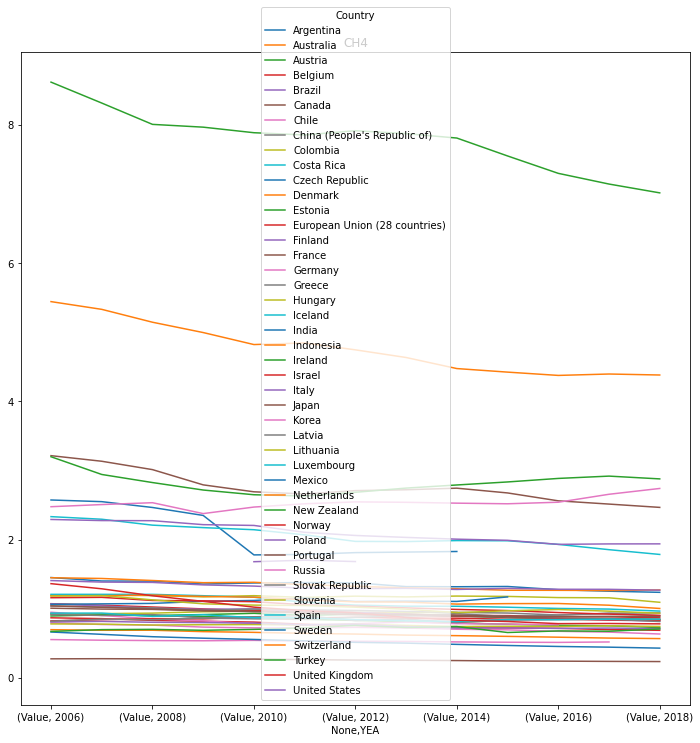

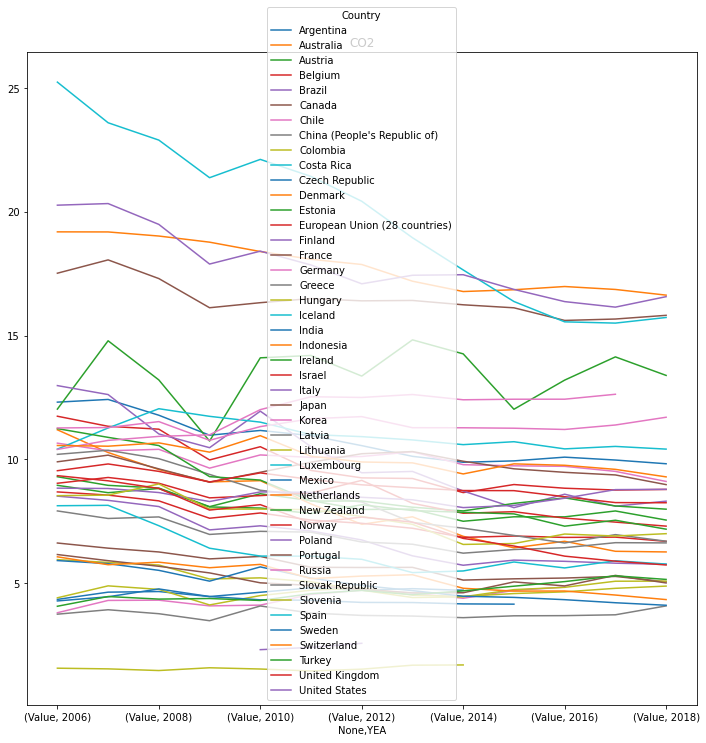

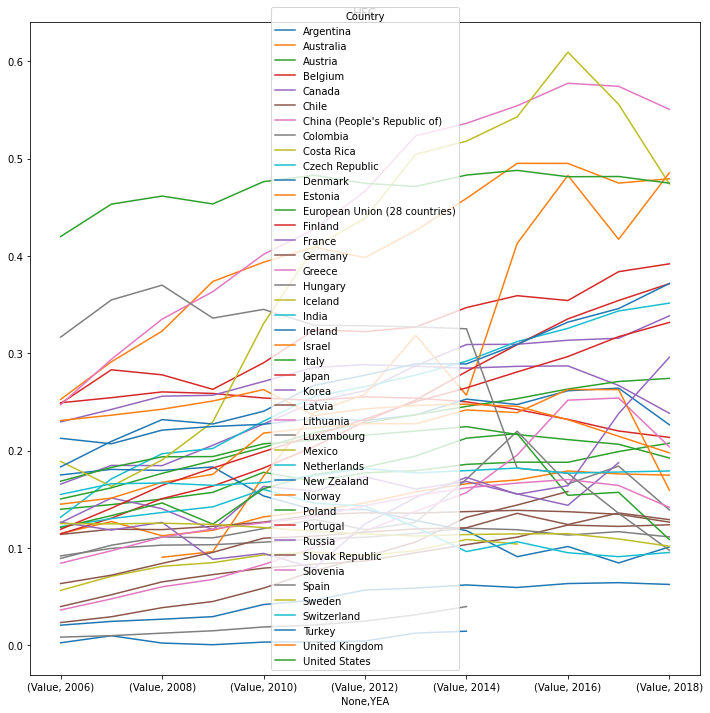

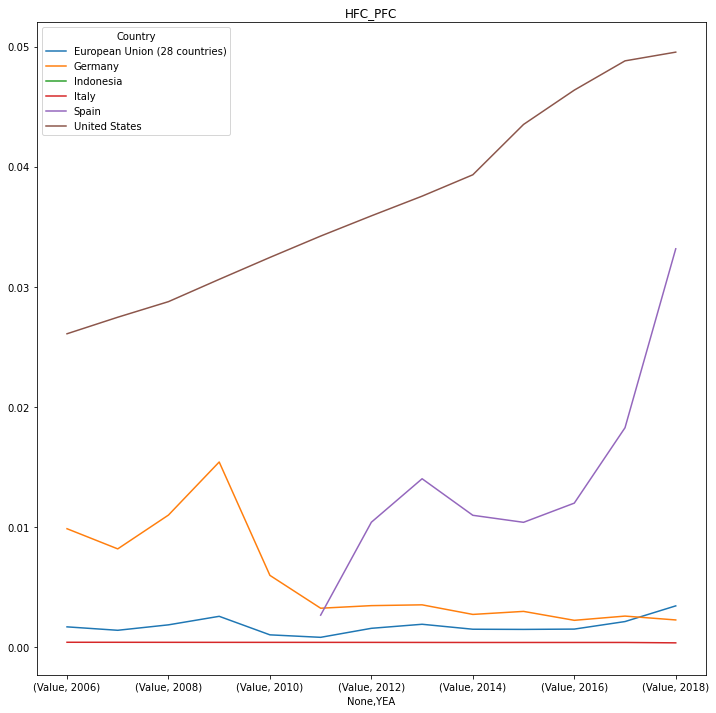

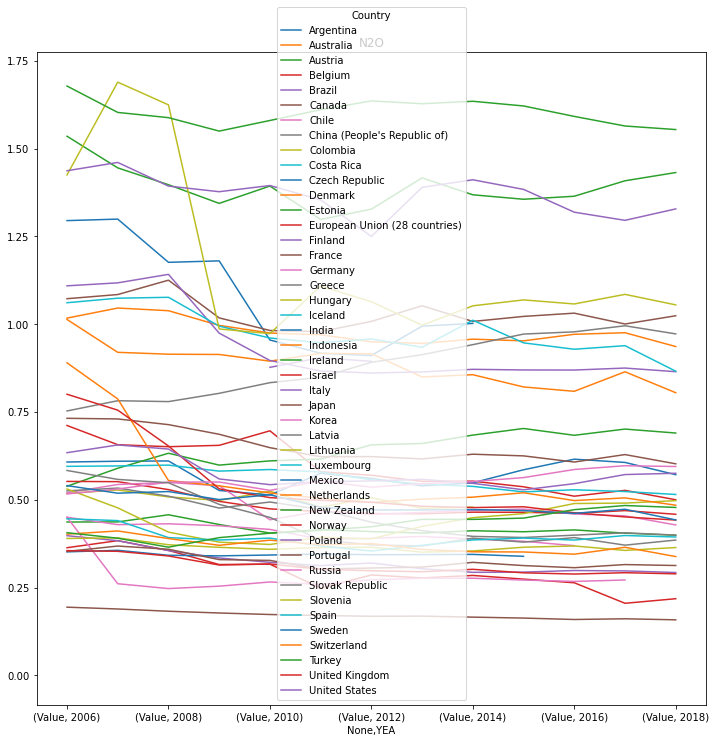

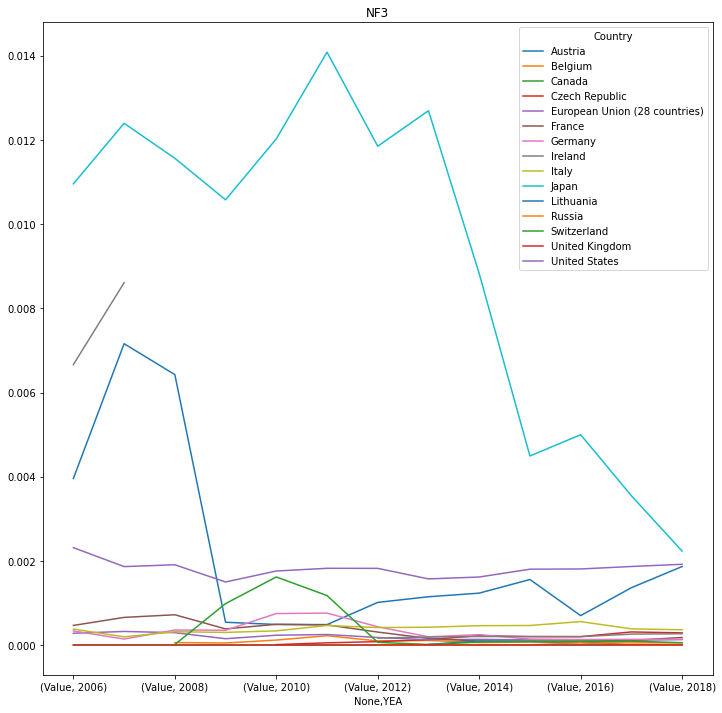

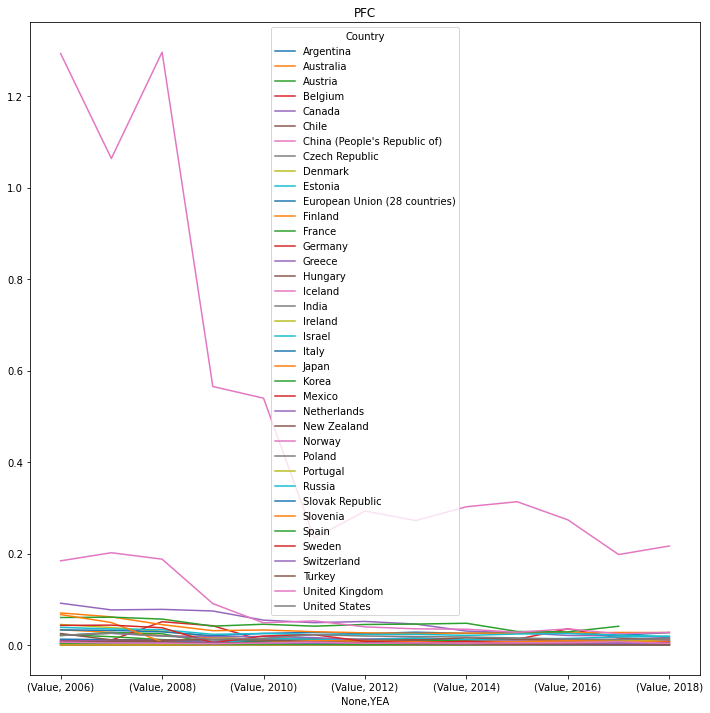

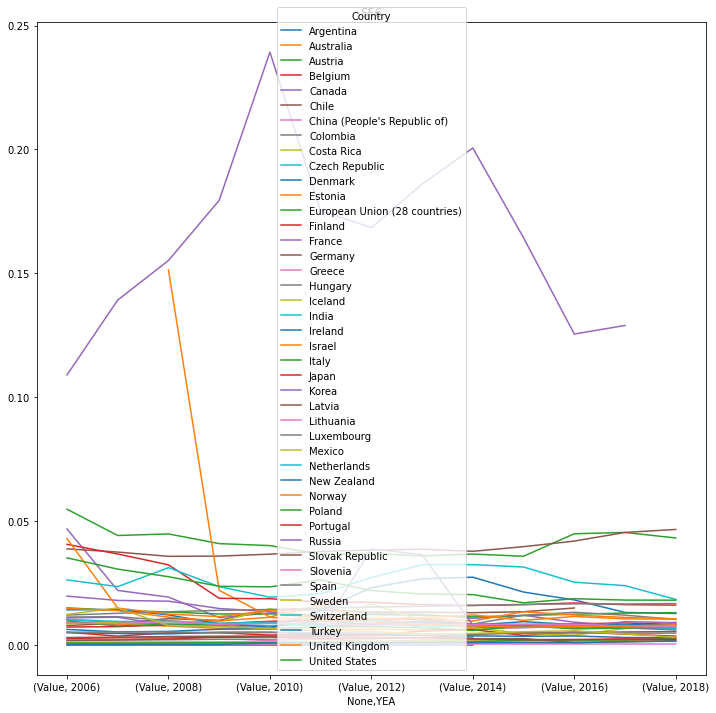

In [18]:
CH4.set_index('Country').transpose().plot(figsize=(12,12), title='CH4')
CO2.set_index('Country').transpose().plot(figsize=(12,12), title='CO2')
HFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC')
HFC_PFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC_PFC')
N2O.set_index('Country').transpose().plot(figsize=(12,12), title='N2O')
NF3.set_index('Country').transpose().plot(figsize=(12,12), title='NF3')
PFC.set_index('Country').transpose().plot(figsize=(12,12), title='PFC')
SF6.set_index('Country').transpose().plot(figsize=(12,12), title='SF6')

## Autofill 2020

In [19]:
CH4 = CH4.transpose().fillna(method='ffill').transpose()
CO2 = CO2.transpose().fillna(method='ffill').transpose()
HFC = HFC.transpose().fillna(method='ffill').transpose()
HFC_PFC = HFC_PFC.transpose().fillna(method='ffill').transpose()
N2O = N2O.transpose().fillna(method='ffill').transpose()
NF3 = NF3.transpose().fillna(method='ffill').transpose()
PFC = PFC.transpose().fillna(method='ffill').transpose()
SF6 = SF6.transpose().fillna(method='ffill').transpose()

In [20]:
conc = [
    CH4[['Country', '2020']].set_index('Country'),
    CO2[['Country', '2020']].set_index('Country'),
    HFC[['Country', '2020']].set_index('Country'),
    HFC_PFC[['Country', '2020']].set_index('Country'),
    N2O[['Country', '2020']].set_index('Country'),
    NF3[['Country', '2020']].set_index('Country'),
    PFC[['Country', '2020']].set_index('Country'),
    SF6[['Country', '2020']].set_index('Country'),
]

res = pd.concat(conc, axis=1, join='outer')

In [21]:
res.columns = ['CH4', 'CO2', 'HFC', 'HFC_PFC', 'N2O', 'NF3', 'PFC', 'SF6']
res

,CH4,CO2,HFC,HFC_PFC,N2O,NF3,PFC,SF6
Argentina,1.82886,4.71024,0.0143704,NaN,1.00211,NaN,0.00374424,4.16457e-05
Australia,4.38254,16.6429,0.47942,NaN,0.804808,NaN,0.00944282,0.00914393
Austria,0.728541,7.54943,0.207606,NaN,0.398982,0.00186836,0.00367957,0.0432413
Belgium,0.68826,8.78728,0.391962,NaN,0.500037,5.66481e-05,0.0115156,0.00833726
Brazil,1.68318,2.56655,NaN,NaN,0.894033,NaN,NaN,NaN
Canada,2.467,15.8263,0.338527,NaN,1.0239,3.23809e-06,0.016758,0.00834877
Chile,0.767192,4.83782,0.157948,NaN,0.369279,NaN,0,0.0149868
China (People's Republic of),0.853622,7.19406,0.11236,NaN,0.464369,NaN,0.00842787,0.0173793
Colombia,0.946694,1.69149,0.0396697,NaN,0.478937,NaN,NaN,0.00328649
Costa Rica,0.820945,1.65124,0.125102,NaN,0.224534,NaN,NaN,0.000401471


In [22]:
## Remove unclear columns
res = res.drop('HFC_PFC', axis=1)
res = res.fillna(-1)

In [23]:
res = res.reset_index(drop=False)
res = res.rename(columns={'index':'Country'})

In [24]:
res.to_csv('./data/OECD/greenhouse_gases_2020_pred.csv')